<a href="https://colab.research.google.com/github/ftsvd/colab-helloworld/blob/master/HelloWorld.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Current Code

Total number of outputs :  6
Output classes :  ['0' '1' '2' '3' '4' '5']
Original label: 5
After conversion to one-hot: [0. 0. 0. 0. 0. 1.]


W0619 21:25:04.503063 139891647010688 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0619 21:25:04.534756 139891647010688 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0619 21:25:04.544480 139891647010688 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0619 21:25:04.572367 139891647010688 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0619 21:25:04.646157 139891647010688 deprecation_wrapp

(244, 64, 64, 1) (62, 64, 64, 1) (244, 6) (62, 6)


W0619 21:25:04.765076 139891647010688 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0619 21:25:04.835795 139891647010688 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 244 samples, validate on 62 samples
Epoch 1/10
244/244 [==============================] - 9s 35ms/step - loss: 0.9349 - acc: 0.6475 - val_loss: 0.1089 - val_acc: 0.9516
Epoch 2/10
244/244 [==============================] - 1s 5ms/step - loss: 0.0962 - acc: 0.9713 - val_loss: 0.0402 - val_acc: 0.9839
Epoch 3/10
244/244 [==============================] - 1s 6ms/step - loss: 0.0188 - acc: 0.9959 - val_loss: 0.0330 - val_acc: 0.9839
Epoch 4/10
244/244 [==============================] - 1s 6ms/step - loss: 0.1380 - acc: 0.9549 - val_loss: 0.0039 - val_acc: 1.0000
Epoch 5/10
244/244 [==============================] - 1s 6ms/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.0035 - val_acc: 1.0000
Epoch 6/10
244/244 [==============================] - 1s 6ms/step - loss: 0.1008 - acc: 0.9795 - val_loss: 0.0072 - val_acc: 1.0000
Epoch 7/10
244/244 [==============================] - 1s 6ms/step - loss: 8.0143e-04 - acc: 1.0000 - val_loss: 0.0027 - val_acc: 1.0000
Epoch 8/10
244/244 [======

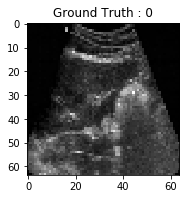

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from keras.utils import to_categorical
# import pydicom

### LOAD TRAIN ###
#get list of training images
from os import walk
f = []
for (dirpath, dirnames, filenames) in walk("gdrive/My Drive/Colab Notebooks/HelloWorld/train"):
  f.extend(filenames)
  break 

#populate train_X and train_Y
train_X = []
train_Y = []
for filename in f:
  #load training images
  im = Image.open("gdrive/My Drive/Colab Notebooks/HelloWorld/train/" + filename, "r")
  pixelarray = np.array(list(im.getdata(0)))
  pixelarray = np.reshape(pixelarray, (64,64))
  train_X.append(pixelarray)
  #load ground truths
  organ = filename.split("-")
  train_Y.append(organ[0])
   
train_X = np.array(train_X)  
train_Y = np.array(train_Y) 

#change strings to integers
for n, i in enumerate(train_Y):
  if i == 'liver':
    train_Y[n] = 0
  if i == 'kidney':
    train_Y[n] = 1
  if i == 'gallbladder':
    train_Y[n] = 2
  if i == 'spleen':
    train_Y[n] = 3
  if i == 'bowel':
    train_Y[n] = 4
  if i == 'bladder':
    train_Y[n] = 5

    
### LOAD TEST ###
#get list of test images
from os import walk
f = []
for (dirpath, dirnames, filenames) in walk("gdrive/My Drive/Colab Notebooks/HelloWorld/test"):
  f.extend(filenames)
  break 

#populate test_X and test_Y
test_X = []
test_Y = []
for filename in f:
  #load training images
  im = Image.open("gdrive/My Drive/Colab Notebooks/HelloWorld/test/" + filename, "r")
  pixelarray = np.array(list(im.getdata(0)))
  pixelarray = np.reshape(pixelarray, (64,64))
  test_X.append(pixelarray)
  #load ground truths
  organ = filename.split("-")
  test_Y.append(organ[0])
   
test_X = np.array(test_X)  
test_Y = np.array(test_Y) 

#change strings to integers
for n, i in enumerate(test_Y):
  if i == 'liver':
    test_Y[n] = 0
  if i == 'kidney':
    test_Y[n] = 1
  if i == 'gallbladder':
    test_Y[n] = 2
  if i == 'spleen':
    test_Y[n] = 3
  if i == 'bowel':
    test_Y[n] = 4
  if i == 'bladder':
    test_Y[n] = 5


#from https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python

# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[200,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[200]))

# Reshape to 64 x 64 x 1
train_X = train_X.reshape(-1, 64, 64, 1)
test_X = test_X.reshape(-1, 64, 64, 1)

# Normalize 0-255 to 0-1
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

# Split training data to 80/20
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

### NEURAL NET
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

batch_size = 1 
epochs = 10 #20
num_classes = 6

fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(64,64,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

#print(fashion_model.summary())

fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

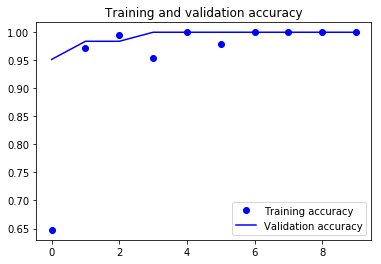

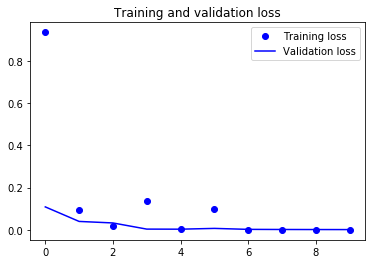

In [6]:
accuracy = fashion_train.history['acc']
val_accuracy = fashion_train.history['val_acc']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Code to read DICOM pixeldata

In [81]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pydicom
from pydicom.data import get_testdata_files

#with os.scandir('gdrive/My Drive/Colab Notebooks/HelloWorld/') as entries:
#  for entry in entries:
#    print(entry.name)

from os import walk
f = []
for (dirpath, dirnames, filenames) in walk("gdrive/My Drive/Colab Notebooks/HelloWorld/data"):
  f.extend(filenames)
  break 

train_X = []
for filename in f:
  dataset = pydicom.dcmread("gdrive/My Drive/Colab Notebooks/HelloWorld/data/" + filename)
  train_X.append(dataset.pixel_array)

train_X = np.array(train_X)  
print(train_X.shape)


  #dataset = pydicom.dcmread("gdrive/My Drive/Colab Notebooks/HelloWorld/ctb.dcm")
'''
if 'PixelData' in dataset:
    rows = int(dataset.Rows)
    cols = int(dataset.Columns)
    print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
        rows=rows, cols=cols, size=len(dataset.PixelData)))
    if 'PixelSpacing' in dataset:
        print("Pixel spacing....:", dataset.PixelSpacing)

# use .get() if not sure the item exists, and want a default value if missing
print("Slice location...:", dataset.get('SliceLocation', "(missing)"))
'''
#  print(dataset.pixel_array.shape);

  # plot the image using matplotlib
#  plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)
#  plt.show()

(2, 512, 512)


'\nif \'PixelData\' in dataset:\n    rows = int(dataset.Rows)\n    cols = int(dataset.Columns)\n    print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(\n        rows=rows, cols=cols, size=len(dataset.PixelData)))\n    if \'PixelSpacing\' in dataset:\n        print("Pixel spacing....:", dataset.PixelSpacing)\n\n# use .get() if not sure the item exists, and want a default value if missing\nprint("Slice location...:", dataset.get(\'SliceLocation\', "(missing)"))\n'

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#@title Default title text
var1 = "" #@param {type:"string"}

print("Hello World")

cars = ["proton", "perodua", "toyota"]

for c in cars:
  print(var1)
  print(c)
  

Hello World

proton

perodua

toyota


Hello World <b>Text</b>

In [0]:
print("Hello World")

cars = ["proton", "perodua", "toyota"]

for c in cars:
  print("car")
  print(c)
  

Hello World
car
proton
car
perodua
car
toyota
